## **SCORING - Cyclooxygenase-1**
#### **Micha Birklbauer 2021-10-08**

In [1]:
import os
from shutil import copyfile
from itertools import islice
copyfile("../../../scripts/python/PIAScore.py", "PIAScore.py")

'PIAScore.py'

In [2]:
import pandas as pd
from PIAScore import *

#### **Load data:**

In [3]:
data_train = pd.read_csv("data_train.csv")
data_val = pd.read_csv("data_val.csv")
data_test = pd.read_csv("data_test.csv")
features = pd.read_csv("features.csv")

In [4]:
# data_train.info()

In [5]:
data_train

,INDEX,NAME,Hydrogen_Bond:ALA527A,Halogen_Bond:ASP110A,Hydrophobic_Interaction:ILE345A,Hydrophobic_Interaction:TYR466A,Hydrogen_Bond:GLU520A,Hydrogen_Bond:VAL116A,Pi-Stacking:PHE205A,Hydrophobic_Interaction:LEU115A,...,Hydrophobic_Interaction:PRO86A,Hydrogen_Bond:TYR348A,Halogen_Bond:TYR355A,Hydrophobic_Interaction:PHE201A,Hydrophobic_Interaction:PRO363A,Hydrogen_Bond:GLN351A,Hydrogen_Bond:SER353A,Water_Bridge:PRO86A,Halogen_Bond:LEU112A,LABEL
0,1,CHEMBL314337|COX1_actives_final_part2|sdf|163,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,active
1,2,CHEMBL305971|COX1_actives_final_part2|sdf|13,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,active
2,3,ZINC00705195|decoys_final|sdf|51,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,inactive
3,4,ZINC17088576|decoys_final|sdf|59,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,inactive
4,5,ZINC06204226|decoys_final|sdf|97,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,786,ZINC38665047|decoys_final|sdf|175,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
786,787,ZINC44154481|decoys_final|sdf|183,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,inactive
787,788,ZINC49252929|decoys_final|sdf|187,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
788,789,CHEMBL260944|actives_final|sdf|76,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,active


In [6]:
print("Training dataset shape & Nr. of actives:")
print(data_train.shape, len(data_train.loc[data_train["LABEL"] == "active"]))

Training dataset shape & Nr. of actives:
(790, 211) 223


In [7]:
print("Validation dataset shape & Nr. of actives:")
print(data_val.shape, len(data_val.loc[data_val["LABEL"] == "active"]))

Validation dataset shape & Nr. of actives:
(198, 211) 60


In [8]:
print("Test dataset shape & Nr. of actives:")
print(data_test.shape, len(data_test.loc[data_test["LABEL"] == "active"]))

Test dataset shape & Nr. of actives:
(248, 211) 74


In [9]:
features

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Pi-Cation_Interaction:ARG120A,0.251920,0.825112,0.573192
1,2,Water_Bridge:TYR355A,0.165421,0.390135,0.555556
2,3,Hydrogen_Bond:ARG120A,0.107528,0.950673,1.058201
3,4,Hydrophobic_Interaction:VAL119A,0.105172,0.434978,0.329806
4,5,Hydrophobic_Interaction:ILE523A,0.099113,0.452915,0.552028
...,...,...,...,...,...
203,204,Hydrophobic_Interaction:PHE470A,0.000506,0.022422,0.022928
204,205,Hydrophobic_Interaction:MET113A,0.000451,0.026906,0.026455
205,206,Hydrophobic_Interaction:MET525A,0.000150,0.008969,0.008818
206,207,Hydrophobic_Interaction:VAL228A,0.000150,0.008969,0.008818


#### **Extract relevant features:**

In [10]:
optimized_values = get_optimized_feature_thresholds(features, data_train)

In [11]:
for item in islice(optimized_values["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.1, 0.0, 0.35000000000000003: strat3 Accuracy: 0.7367088607594937
Key: 0.1, 0.0, 0.4: strat3 Accuracy: 0.7367088607594937
Key: 0.1, 0.0, 0.45: strat3 Accuracy: 0.7367088607594937
Key: 0.1, 0.0, 0.5: strat3 Accuracy: 0.7367088607594937
Key: 0.1, 0.0, 0.55: strat3 Accuracy: 0.7367088607594937


In [12]:
for item in islice(optimized_values["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat4 Area under the ROC curve: 0.6916822866000744
Key: 0.0, 0.0, 0.0: strat3 Area under the ROC curve: 0.6893729091038509
Key: 0.0, 0.0, 0.0: strat2 Area under the ROC curve: 0.6658718295489595
Key: 0.0, 0.0, 0.0: strat1 Area under the ROC curve: 0.6607469096258334
Key: 0.0, 0.05, 0.0: strat4 Area under the ROC curve: 0.6446129024604361


In [13]:
optimized_values_val = get_optimized_feature_thresholds(features, data_train, data_val)

In [14]:
for item in islice(optimized_values_val["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.05, 0.0, 0.0: strat3 Accuracy: 0.7171717171717171
Key: 0.05, 0.0, 0.05: strat3 Accuracy: 0.7171717171717171
Key: 0.05, 0.0, 0.1: strat3 Accuracy: 0.7171717171717171
Key: 0.05, 0.0, 0.15000000000000002: strat3 Accuracy: 0.7171717171717171
Key: 0.05, 0.0, 0.2: strat3 Accuracy: 0.7171717171717171


In [15]:
for item in islice(optimized_values_val["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.05, 0.0, 0.0: strat4 Area under the ROC curve: 0.6361111111111111
Key: 0.05, 0.0, 0.05: strat4 Area under the ROC curve: 0.6361111111111111
Key: 0.05, 0.0, 0.1: strat4 Area under the ROC curve: 0.6361111111111111
Key: 0.05, 0.0, 0.15000000000000002: strat4 Area under the ROC curve: 0.6361111111111111
Key: 0.05, 0.05, 0.0: strat4 Area under the ROC curve: 0.6361111111111111


In [16]:
features_filtered = get_relevant_features(features, 0.05, 0.0, 0.2)
features_filtered

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Pi-Cation_Interaction:ARG120A,0.251920,0.825112,0.573192
1,2,Water_Bridge:TYR355A,0.165421,0.390135,0.555556
2,3,Hydrogen_Bond:ARG120A,0.107528,0.950673,1.058201
3,4,Hydrophobic_Interaction:VAL119A,0.105172,0.434978,0.329806
4,5,Hydrophobic_Interaction:ILE523A,0.099113,0.452915,0.552028
5,6,Hydrophobic_Interaction:LEU357A,0.073180,0.367713,0.294533
6,7,Hydrophobic_Interaction:LEU93A,0.069210,0.762332,0.693122
8,9,Hydrophobic_Interaction:VAL116A,0.053843,0.739910,0.686067
9,10,Hydrophobic_Interaction:HIS90A,0.050276,0.367713,0.417989


In [17]:
# some error checking -- should print nothing
for item in features_filtered["INTERACTION"].to_list():
    if item not in data_train.columns.to_list():
        print(item)

#### **Get positive features (e.g. features that have a positive impact on activeness) and negative features:**

In [18]:
positives, negatives = get_feature_impact(features_filtered)

In [19]:
positives

['Pi-Cation_Interaction:ARG120A',
 'Hydrophobic_Interaction:VAL119A',
 'Hydrophobic_Interaction:LEU357A',
 'Hydrophobic_Interaction:LEU93A',
 'Hydrophobic_Interaction:VAL116A']

In [20]:
negatives

['Water_Bridge:TYR355A',
 'Hydrogen_Bond:ARG120A',
 'Hydrophobic_Interaction:ILE523A',
 'Hydrophobic_Interaction:HIS90A']

#### **Score Compounds with different strategies & save results:**

In [21]:
save = False

# make data copies
train_result_strat1 = data_train.copy()
train_result_strat2 = data_train.copy()
train_result_strat3 = data_train.copy()
train_result_strat4 = data_train.copy()
# calculate scores
train_result_strat1["SCORE"] = train_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
train_result_strat2["SCORE"] = train_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
train_result_strat3["SCORE"] = train_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
train_result_strat4["SCORE"] = train_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
train_result_strat1_sorted = train_result_strat1.sort_values(by = "SCORE", ascending = False)
train_result_strat2_sorted = train_result_strat2.sort_values(by = "SCORE", ascending = False)
train_result_strat3_sorted = train_result_strat3.sort_values(by = "SCORE", ascending = False)
train_result_strat4_sorted = train_result_strat4.sort_values(by = "SCORE", ascending = False)
# save data
if save:
    train_result_strat1_sorted.to_csv("train_scores1.csv")
    train_result_strat2_sorted.to_csv("train_scores2.csv")
    train_result_strat3_sorted.to_csv("train_scores3.csv")
    train_result_strat4_sorted.to_csv("train_scores4.csv")

#### **Find best cutoff value and print metrics:**

*cutoff/accuracy for different strategies:*

In [22]:
print(
"Strategy 1: ",
get_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list()),
"\nStrategy 2: ",
get_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list()),
"\nStrategy 3: ",
get_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list()),
"\nStrategy 4: ",
get_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list())
)

Strategy 1:  [5, 0.7189873417721518] 
Strategy 2:  [5, 0.7164556962025317] 
Strategy 3:  [4, 0.7227848101265822] 
Strategy 4:  [4, 0.7240506329113924]


*accuracy for best cutoff:*

In [23]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 5, "accuracy"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 5, "accuracy"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 4, "accuracy"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 4, "accuracy")
)

Strategy 1:  0.7189873417721518 
Strategy 2:  0.7164556962025317 
Strategy 3:  0.7227848101265822 
Strategy 4:  0.7240506329113924


*false positive rate for best cutoff:*

In [24]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 5, "fpr"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 5, "fpr"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 4, "fpr"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 4, "fpr")
)

Strategy 1:  0.037037037037037035 
Strategy 2:  0.06172839506172839 
Strategy 3:  0.024691358024691357 
Strategy 4:  0.031746031746031744


#### **Calculate validation and test results:**

In [25]:
# make data copies
val_result_strat1 = data_val.copy()
val_result_strat2 = data_val.copy()
val_result_strat3 = data_val.copy()
val_result_strat4 = data_val.copy()
# calculate scores
val_result_strat1["SCORE"] = val_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
val_result_strat2["SCORE"] = val_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
val_result_strat3["SCORE"] = val_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
val_result_strat4["SCORE"] = val_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
val_result_strat1_sorted = val_result_strat1.sort_values(by = "SCORE", ascending = False)
val_result_strat2_sorted = val_result_strat2.sort_values(by = "SCORE", ascending = False)
val_result_strat3_sorted = val_result_strat3.sort_values(by = "SCORE", ascending = False)
val_result_strat4_sorted = val_result_strat4.sort_values(by = "SCORE", ascending = False)

In [26]:
# make data copies
test_result_strat1 = data_test.copy()
test_result_strat2 = data_test.copy()
test_result_strat3 = data_test.copy()
test_result_strat4 = data_test.copy()
# calculate scores
test_result_strat1["SCORE"] = test_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
test_result_strat2["SCORE"] = test_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
test_result_strat3["SCORE"] = test_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
test_result_strat4["SCORE"] = test_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
test_result_strat1_sorted = test_result_strat1.sort_values(by = "SCORE", ascending = False)
test_result_strat2_sorted = test_result_strat2.sort_values(by = "SCORE", ascending = False)
test_result_strat3_sorted = test_result_strat3.sort_values(by = "SCORE", ascending = False)
test_result_strat4_sorted = test_result_strat4.sort_values(by = "SCORE", ascending = False)

#### **Quality metrics for training and validation data:**

*training data:*

In [27]:
print(
"Strategy 1: ",
get_metrics(train_result_strat1, 5, pretty_print = True),
"\nStrategy 2: ",
get_metrics(train_result_strat2, 5, pretty_print = True),
"\nStrategy 3: ",
get_metrics(train_result_strat3, 4, pretty_print = True),
"\nStrategy 4: ",
get_metrics(train_result_strat4, 4, pretty_print = True)
)

Strategy 1:  {'ACC': 0.7189873417721518, 'FPR': 0.037037037037037035, 'AUC': 0.6070380651845526, 'Ya': 0.5116279069767442, 'EF': 1.8124934821149234, 'REF': 51.16279069767442} 
Strategy 2:  {'ACC': 0.7164556962025317, 'FPR': 0.06172839506172839, 'AUC': 0.6156468234196186, 'Ya': 0.4927536231884058, 'EF': 1.745629427438747, 'REF': 49.27536231884058} 
Strategy 3:  {'ACC': 0.7227848101265822, 'FPR': 0.024691358024691357, 'AUC': 0.6330185620170672, 'Ya': 0.5625, 'EF': 1.9927130044843049, 'REF': 56.25} 
Strategy 4:  {'ACC': 0.7240506329113924, 'FPR': 0.031746031746031744, 'AUC': 0.6358499220980536, 'Ya': 0.5609756097560976, 'EF': 1.98731269823909, 'REF': 56.09756097560975}


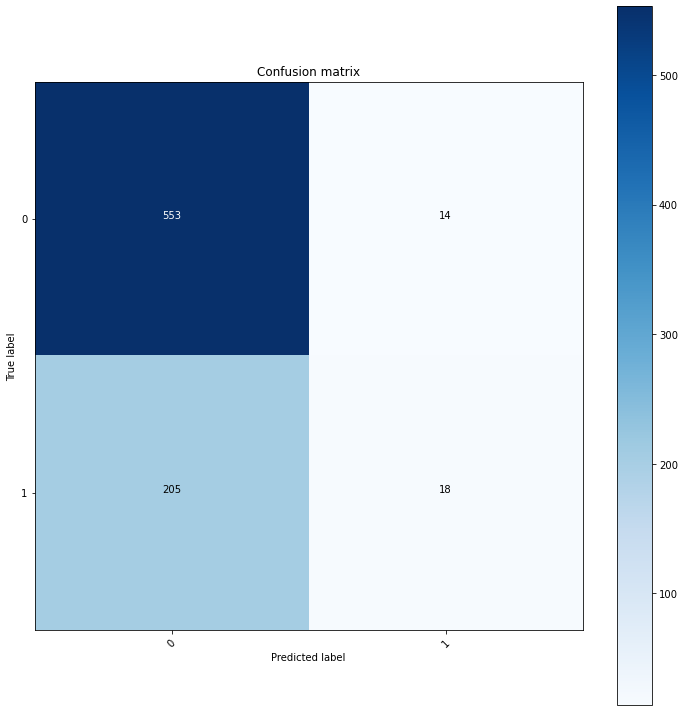

In [28]:
plot_confusion_matrix(get_metrics(train_result_strat3, 4)["CM"], classes = [0, 1], filename = "results/CM_train_strat3.png");

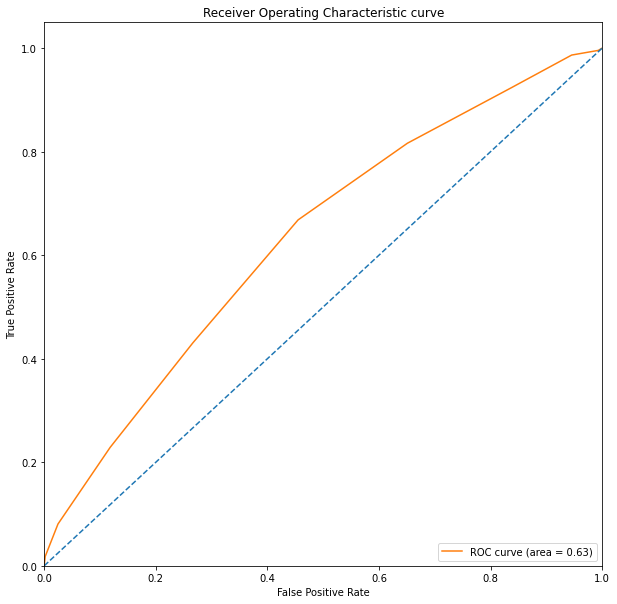

In [29]:
roc = get_metrics(train_result_strat3, 4)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_train_strat3.png");

*validation data:*

In [30]:
print(
"Strategy 1: ",
get_metrics(val_result_strat1, 5, pretty_print = True),
"\nStrategy 2: ",
get_metrics(val_result_strat2, 5, pretty_print = True),
"\nStrategy 3: ",
get_metrics(val_result_strat3, 4, pretty_print = True),
"\nStrategy 4: ",
get_metrics(val_result_strat4, 4, pretty_print = True)
)

Strategy 1:  {'ACC': 0.702020202020202, 'FPR': 0.007246376811594203, 'AUC': 0.5214371980676329, 'Ya': 0.6666666666666666, 'EF': 2.1999999999999997, 'REF': 66.66666666666667} 
Strategy 2:  {'ACC': 0.6868686868686869, 'FPR': 0.043478260869565216, 'AUC': 0.5344202898550725, 'Ya': 0.4, 'EF': 1.32, 'REF': 40.0} 
Strategy 3:  {'ACC': 0.7171717171717171, 'FPR': 0.014492753623188406, 'AUC': 0.5995772946859903, 'Ya': 0.75, 'EF': 2.475, 'REF': 75.0} 
Strategy 4:  {'ACC': 0.696969696969697, 'FPR': 0.043478260869565216, 'AUC': 0.6259661835748792, 'Ya': 0.5, 'EF': 1.65, 'REF': 50.0}


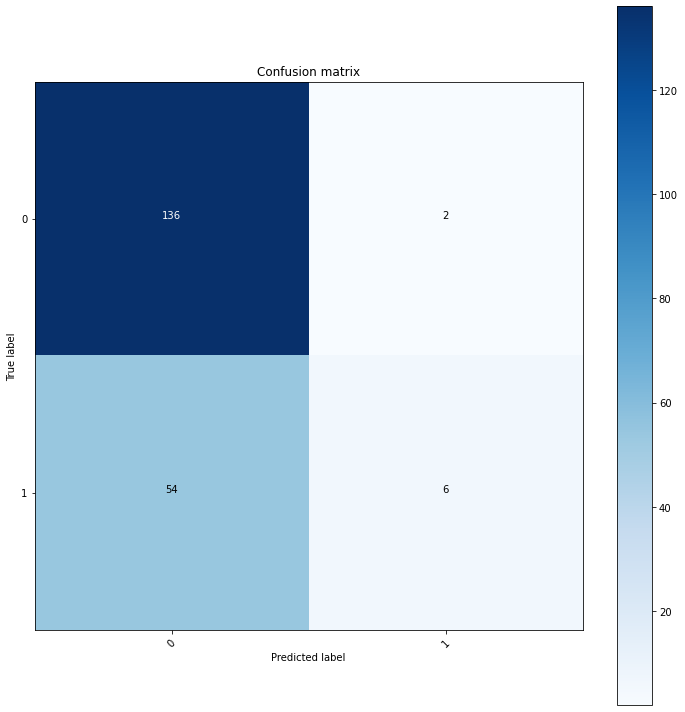

In [31]:
plot_confusion_matrix(get_metrics(val_result_strat3, 4)["CM"], classes = [0, 1], filename = "results/CM_val_strat3.png");

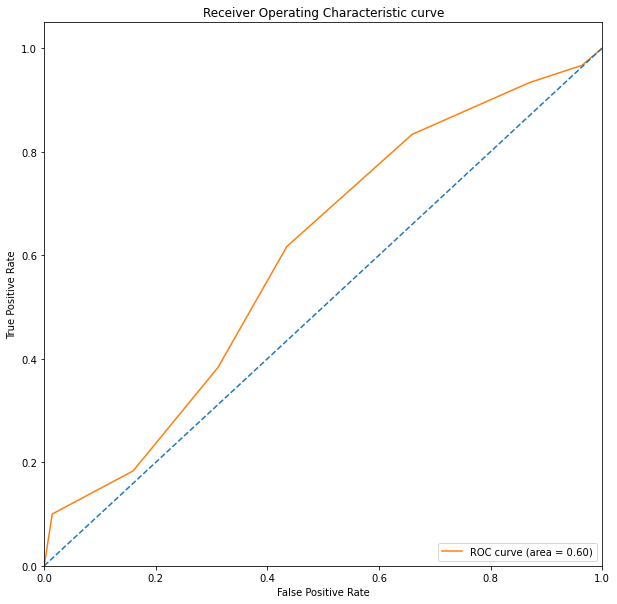

In [32]:
roc = get_metrics(val_result_strat3, 4)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_val_strat3.png");

*test data:*

In [33]:
print(
"Strategy 1: ",
get_metrics(test_result_strat1, 5, pretty_print = True),
"\nStrategy 2: ",
get_metrics(test_result_strat2, 5, pretty_print = True),
"\nStrategy 3: ",
get_metrics(test_result_strat3, 4, pretty_print = True),
"\nStrategy 4: ",
get_metrics(test_result_strat4, 4, pretty_print = True)
)

Strategy 1:  {'ACC': 0.7016129032258065, 'FPR': 0.06321839080459771, 'AUC': 0.669812053432743, 'Ya': 0.5, 'EF': 1.6756756756756757, 'REF': 50.0} 
Strategy 2:  {'ACC': 0.7096774193548387, 'FPR': 0.09195402298850575, 'AUC': 0.6798695246971109, 'Ya': 0.5294117647058824, 'EF': 1.7742448330683624, 'REF': 52.94117647058823} 
Strategy 3:  {'ACC': 0.7016129032258065, 'FPR': 0.034482758620689655, 'AUC': 0.6684141037589313, 'Ya': 0.5, 'EF': 1.6756756756756757, 'REF': 50.0} 
Strategy 4:  {'ACC': 0.7137096774193549, 'FPR': 0.034482758620689655, 'AUC': 0.6578129853991923, 'Ya': 0.6, 'EF': 2.0108108108108107, 'REF': 60.0}


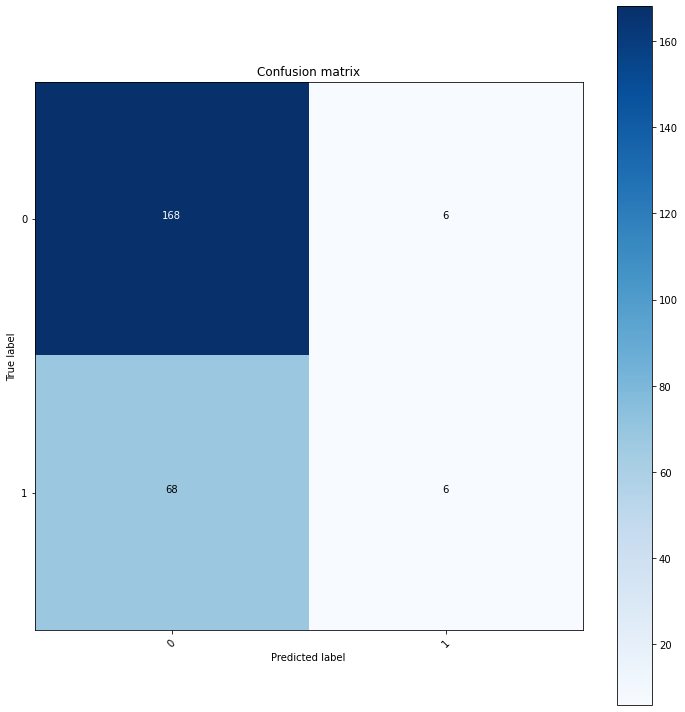

In [34]:
plot_confusion_matrix(get_metrics(test_result_strat3, 4)["CM"], classes = [0, 1], filename = "results/CM_test_strat3.png");

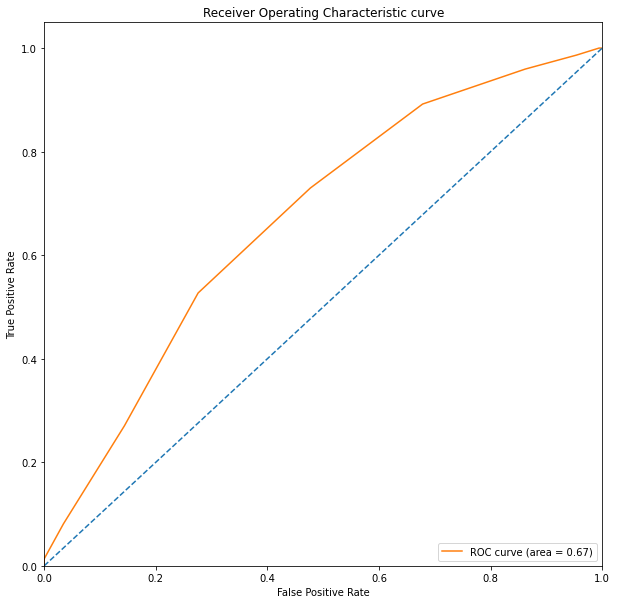

In [35]:
roc = get_metrics(test_result_strat3, 4)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_test_strat3.png");

#### **Clean up:**

In [36]:
os.remove("PIAScore.py")